   PassengerId  Survived  Pclass                          Name     Sex  Age  \
0            1         0       3       Braund, Mr. Owen Harris    male   22   
1            2         1       1    Cumings, Mrs. John Bradley  female   38   
2            3         1       3        Heikkinen, Miss. Laina  female   26   
3            4         1       1  Futrelle, Mrs. Jacques Heath  female   35   
4            5         0       3      Allen, Mr. William Henry    male   35   

   SibSp  Parch     Ticket    Fare Cabin Embarked  
0      1      0  A/5 21171   7.250   NaN        S  
1      1      0   PC 17599  71.280   C85        C  
2      0      0   STON/O2.   7.925   NaN        S  
3      1      0     113803  53.100  C123        S  
4      0      0     373450   8.050   NaN        S  
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro av

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


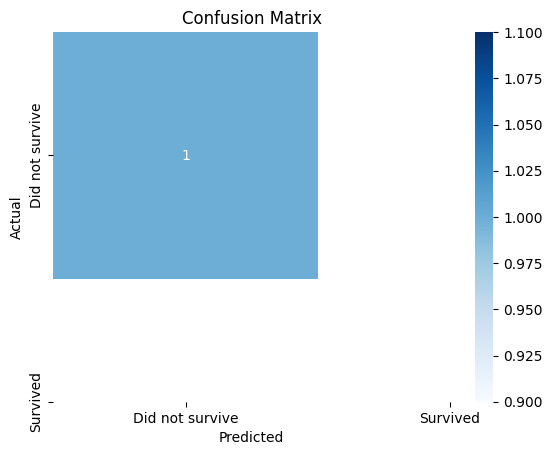

Predictions saved to submission.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
train_data = pd.read_csv("train.csv")  # Replace with the path to your train.csv file
test_data = pd.read_csv("test.csv")    # Replace with the path to your test.csv file

# Display the first few rows of the dataset
print(train_data.head())

# Preprocessing the data
def preprocess_data(data):
    # Fill missing 'Age' with median
    data['Age'] = data['Age'].fillna(data['Age'].median())

    # Fill missing 'Embarked' with mode
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

    # Fill missing 'Fare' in the test dataset
    if 'Fare' in data.columns:
        data['Fare'] = data['Fare'].fillna(data['Fare'].median())

    # Convert 'Sex' to numeric
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

    # Convert 'Embarked' to numeric
    data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Drop irrelevant columns
    data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Separate features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Predict on the test dataset
test_predictions = model.predict(test_data)

# Save predictions to a CSV file for submission
output = pd.DataFrame({'PassengerId': pd.read_csv("test.csv")['PassengerId'], 'Survived': test_predictions})
output.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")


In [ ]:
dd = pd.read_csv("submission.csv")
dd

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
